In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import io, img_as_float
import tifffile as tiff
from skimage.morphology import white_tophat, disk, rectangle
from skimage import measure, morphology
from skimage.measure import label, regionprops
from skimage.exposure import equalize_adapthist, is_low_contrast
from numpy.polynomial.polynomial import polyvander2d, Polynomial
from skimage.filters import threshold_otsu, threshold_local
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import scipy.io as sio
import warnings

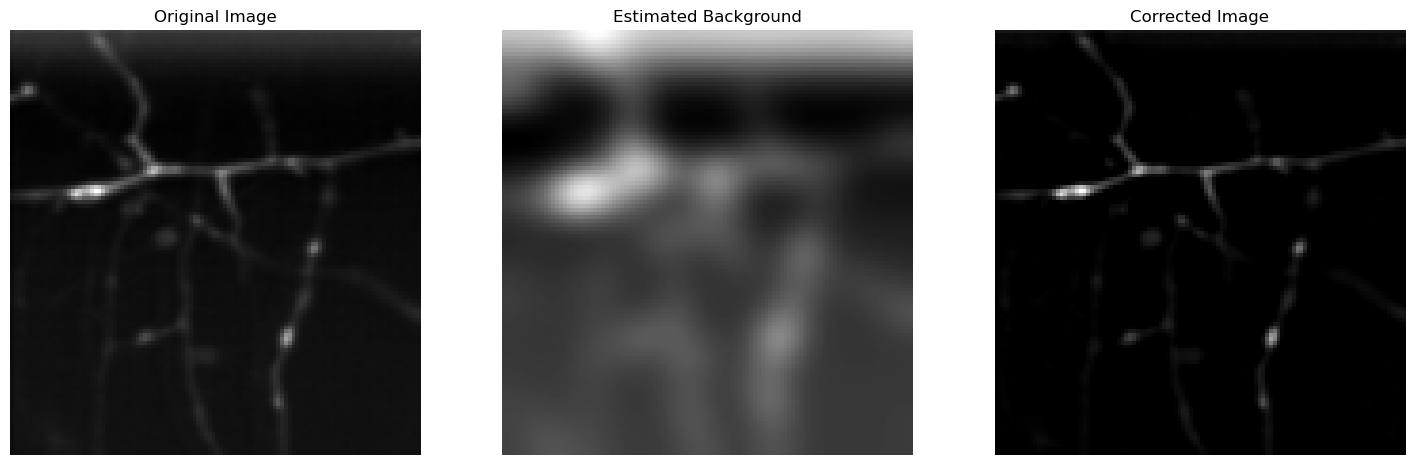

In [127]:
# Load the microscopy image
data_folder = 'E:\\Spandan\\2D_Neurons_Paper\\Glass\\div7\\control_2019_06_24_cortical_div7_timelapse_2\\'

file_name = 'cortical_div7_timelapse_2_jttr_blch_corr_cropped'
all_frames = tiff.imread(data_folder+'\\'+file_name+'.tif') 
image = np.mean(all_frames, axis = 0)
     
# Apply a Gaussian filter to estimate the background illumination
blurred = gaussian_filter(image, sigma=5)

# Subtract the blurred image from the original image
corrected = image - blurred

# Clip any negative values to zero
corrected[corrected < 0] = 0

# Display the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Estimated Background')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Corrected Image')
plt.imshow(corrected, cmap='gray')
plt.axis('off')

plt.show()

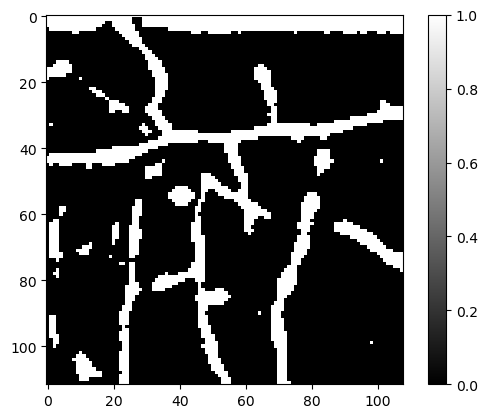

In [117]:
cropped_mask = (corrected > 5); 
plt.imshow(cropped_mask,cmap='grey')
plt.colorbar()

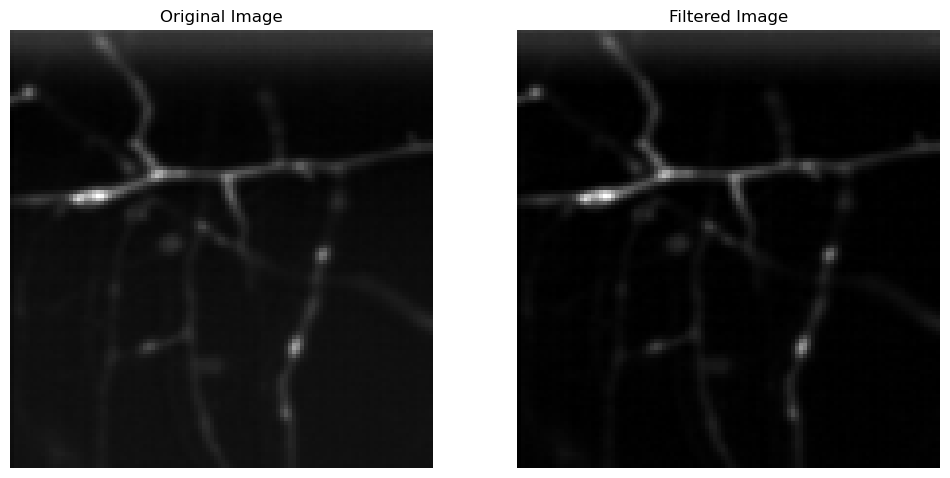

In [118]:
# Create a ball-shaped (or rectangular) structuring element
selem = disk(radius=15)
# selem = rectangle(30, 5)

# Apply the white tophat filter with the structuring element
corrected_tphat = white_tophat(image, selem)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(corrected_tphat, cmap='gray')
plt.axis('off')

plt.show()

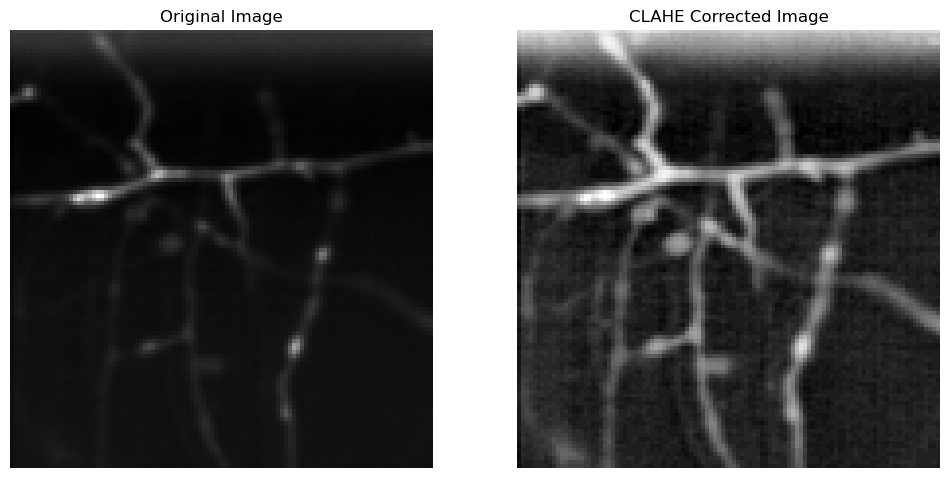

In [119]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
image = image/np.max(image)
corrected_clahe = equalize_adapthist(image, clip_limit=0.03)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CLAHE Corrected Image')
plt.imshow(corrected_clahe, cmap='gray')
plt.axis('off')

plt.show()

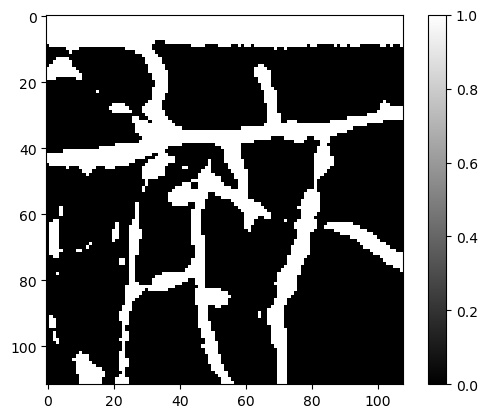

In [121]:
mask2 = corrected_clahe>0.25
plt.imshow(mask2, cmap='gray'); plt.colorbar()

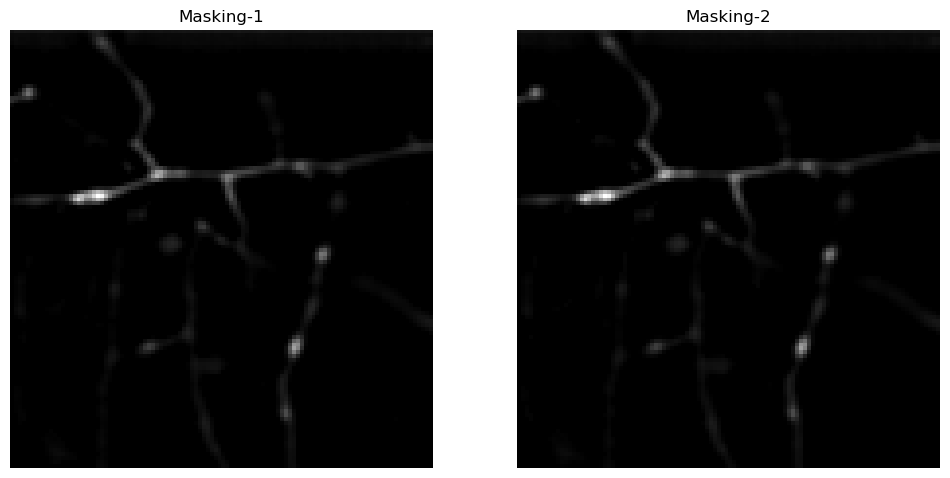

In [122]:
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Masking-1')
plt.imshow(corrected*cropped_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Masking-2')
plt.imshow(corrected*mask2, cmap='gray')
plt.axis('off')

plt.show()


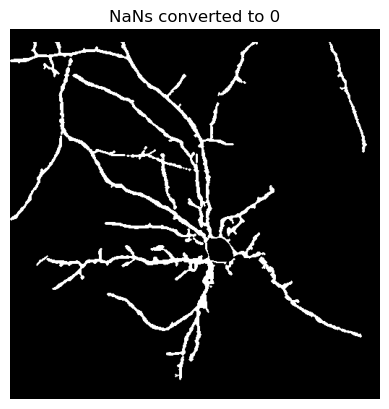

In [143]:
# Load the mask
mask = sio.loadmat(data_folder + '\\neural_mask.mat')['neural_mask']

# Convert the mask to float
mask = mask.astype(float)

# Replace NaN values with zero
mask[np.isnan(mask)] = 0

# Visualize
plt.imshow(mask, cmap='gray')
plt.title("NaNs converted to 0")
plt.axis('off')
plt.show()


In [144]:
data_folder = 'E:\\Spandan\\2D_Neurons_Paper\\Glass\\div7\\control_2019_06_24_cortical_div7_timelapse_2\\'

file_name = 'cortical_div7_timelapse_2_jttr_blch_corr'
all_frames = tiff.imread(data_folder+'\\'+file_name+'.tiff') 

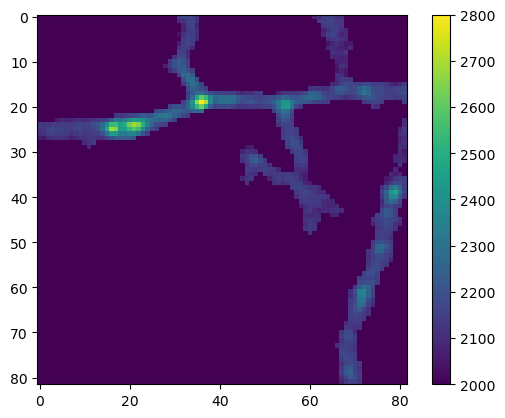

In [178]:
plt.imshow(np.squeeze(all_frames[160,18:100,1:83]*mask[18:100,1:83]),vmin=2000,vmax=2800)
plt.axis('image')
plt.colorbar()

In [183]:
save_path = 'E:\\Spandan\\2D_Neurons_Paper\\Glass\\div7\\control_2019_06_24_cortical_div7_timelapse_2\\Chosen_frames'

# Ensure the save path exists
os.makedirs(save_path, exist_ok=True)

# List of frames to save
frames = np.array([56, 72, 92, 110, 144, 160])

# Define crop region
y_start, y_end = 18, 100
x_start, x_end = 1, 83

# Apply cropping once to the mask
cropped_mask = mask[y_start:y_end, x_start:x_end]

for frame in frames:
    # Crop and mask the frame
    cropped_frame = all_frames[frame, y_start:y_end, x_start:x_end]
    masked_frame = np.squeeze(cropped_frame * cropped_mask)

    # Plot and save
    plt.figure(figsize=(6, 6))
    plt.imshow(masked_frame, cmap='gray', vmin=2000, vmax=2800)
    plt.axis('image')
    plt.xticks([])  # remove x ticks
    plt.yticks([])  # remove y ticks
    # plt.colorbar()  # optionally re-enable this if needed

    filename = os.path.join(save_path, f'masked_cropped_frame_{frame}.tif')
    plt.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0)
    plt.close()


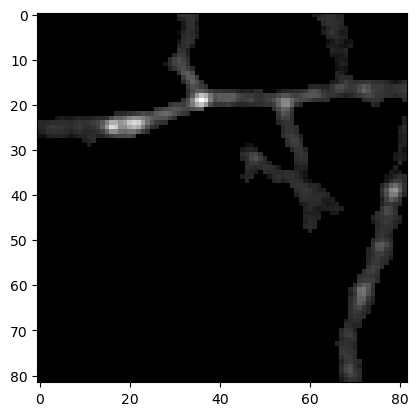

In [180]:
plt.imshow(masked_frame, cmap='gray', vmin=2000, vmax=2800)